In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("../data/50_startups.csv")


In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [ ]:
X

In [11]:
label_encoder = LabelEncoder()
X[:, 3] = label_encoder.fit_transform(X[:, 3])

column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],
    remainder='passthrough'  
)

X = column_transformer.fit_transform(X)

In [ ]:
X = X[:, 1:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

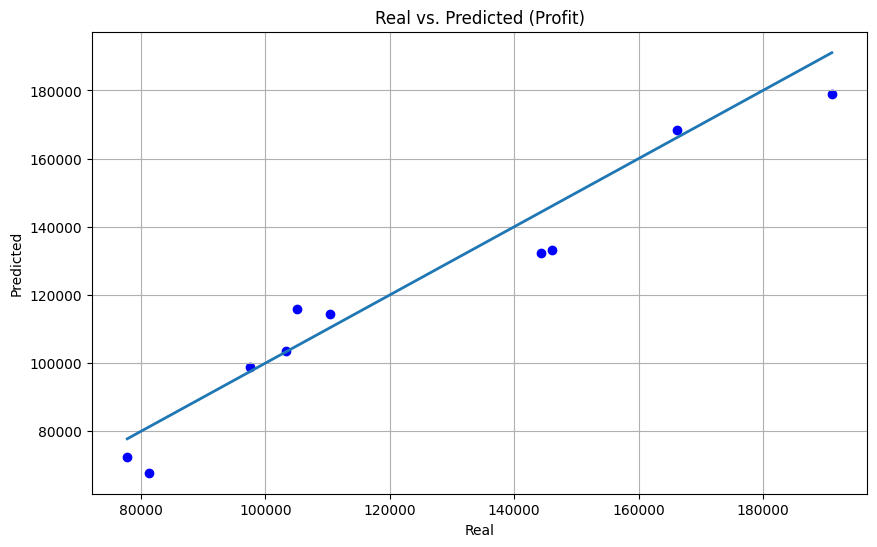

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=1) 
plt.grid()
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.title('Real vs. Predicted (Profit)')
plt.show()

In [54]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [55]:
mean_absolute_error(y_test, y_pred)

7474.740626469118

In [56]:
mean_absolute_percentage_error(y_test, y_pred)

0.0640060288278961

In [57]:
mean_squared_error(y_test, y_pred)

80949594.99395517